<a href="https://colab.research.google.com/github/KacperKaszuba0608/ML_projects/blob/main/Credit_Card_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Guided Project: Credit Card Customer Segmentation

In this project I analysed data from a credi card company. The idea of the project is to help segment customers into different groups in order to apply different business strategies for each type of customer. To achieve that I have to use the K-means algorithm and in order to use it properly. I'll go through the following steps:
1. Analyze the dataset;
2. Prepare the data for modeling;
3. Fing an appropriate number of clusters;
4. Segment the data;
5. Interpret and try to explain the results.

The dataset are available on [] and has following columns:
* `customer_id`: unique identifier for each customer.
* `age`: customer age in years.
* `gender`: customer gender (M or F).
* `dependent_count`: number of dependents of each customer.
* `education_level`: level of education ("High School", "Graduate", etc.).
* `marital_status`: marital status ("Single", "Married", etc.).
* `estimated_income`: the estimated income for the customer projected by the data science team.
* `months_on_book`: time as a customer in months.
* `total_relationship_count`: number of times the customer contacted the company.
* `months_inactive_12_mon`: number of months the customer did not use the credit card in the last 12 months.
* `credit_limit`: customer's credit limit.
* `total_trans_amount`: the overall amount of money spent on the card by the customer.
* `total_trans_count`: the overall number of times the customer used the card.
* `avg_utilization_ratio`: daily average utilization ratio.

## Reading in data and importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

%matplotlib inline

customers = pd.read_csv('https://dq-content.s3.amazonaws.com/745/customer_segmentation.csv')
customers.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000


In [2]:
customers.shape

(10127, 14)

In [3]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_ratio     10127 non-null  float64
dtypes: flo

As we see above we have 14 columns and approximately 10000 rows. At first we can remove 1st column which is just an id of client and it won't be use in model. We can identify three categorcial features and we will decode them to integer equivalent.

The dataset doesn't have missing values too, so let's check any anomaly.

In [4]:
customers_modif = customers.drop('customer_id', axis=1)
customers_modif.describe()

,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,62078.206774,35.928409,3.812580,2.341167,8631.953698,4404.086304,64.858695,0.274894
std,8.016814,1.298908,39372.861291,7.986416,1.554408,1.010622,9088.776650,3397.129254,23.472570,0.275691
min,26.000000,0.000000,20000.000000,13.000000,1.000000,0.000000,1438.300000,510.000000,10.000000,0.000000
25%,41.000000,1.000000,32000.000000,31.000000,3.000000,2.000000,2555.000000,2155.500000,45.000000,0.023000
50%,46.000000,2.000000,50000.000000,36.000000,4.000000,2.000000,4549.000000,3899.000000,67.000000,0.176000
75%,52.000000,3.000000,80000.000000,40.000000,5.000000,3.000000,11067.500000,4741.000000,81.000000,0.503000
max,73.000000,5.000000,200000.000000,56.000000,6.000000,6.000000,34516.000000,18484.000000,139.000000,0.999000


In [5]:
categorical_variables = ['gender', 'education_level', 'marital_status']

for i in categorical_variables:
    print(customers_modif[i].value_counts(), end='\n\n')

gender
F    5358
M    4769
Name: count, dtype: int64

education_level
Graduate         3685
High School      2351
Uneducated       1755
College          1192
Post-Graduate     616
Doctorate         528
Name: count, dtype: int64

marital_status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64



As we see above the summary of continuous and categorical variables, everything looks great.

<Axes: >

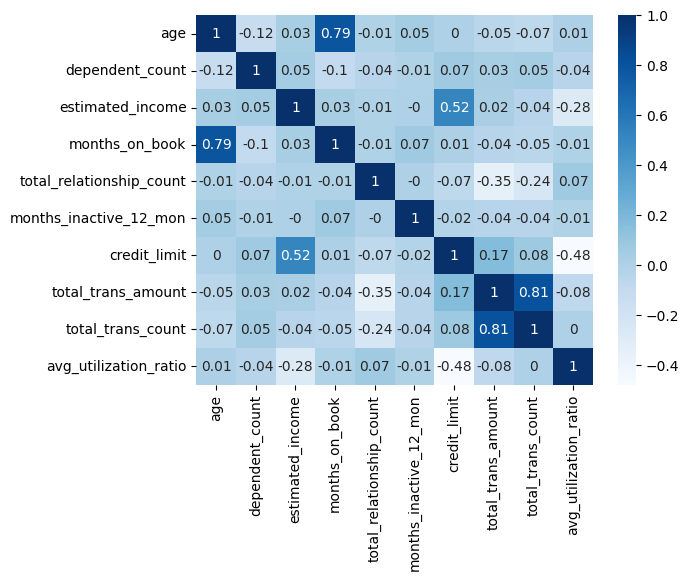

In [6]:
corrs = round(customers_modif[customers_modif.select_dtypes(include=np.number).columns].corr(),2)
sns.heatmap(corrs, cmap='Blues', annot=True)

We have four particular correlations:
1. semi-strong corr: `credit_limit` with `estimated_income` (0.52)
2. semi strong corr: `avg_utilization_ratio` with `credit_limit` (-0.48)
3. strong corr: `months_on_book` with `age` (0.79)
4. strong corr `total_trans_amount` with `total_trans_count` (0.81)

<ipython-input-7-cf01b2974c2e>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  customers_modif.hist(ax=ax)


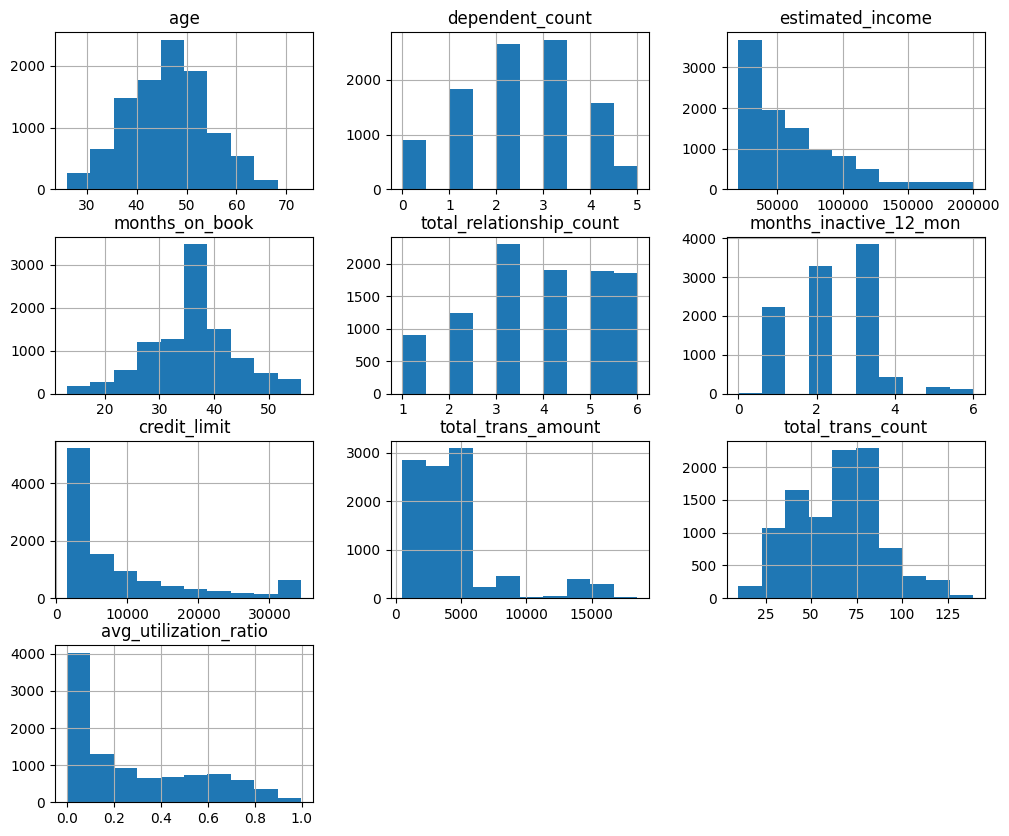

In [7]:
fig, ax = plt.subplots(figsize = (12,10))

customers_modif.hist(ax=ax)

plt.show()

Histograms above show as that most variables have distribution close to normal, but most of them ar skewed.

## Feature Engineering

Now, we will handle with categorical variables: gender, education level and martial status.

The gender column contains only 2 unique values, "M" and "F", which means it's possible to replace all the rows with 1 and 0.

The education_level column contains 6 unique values. This column represents levels of education, and it's possible to rank the levels from the lowest to the highest, so it's possible to replace each unique level with a number, assuming we respect the following order:
* `Uneducated` - `0`
* `High School` - `1`
* `College` - `2`
* `Graduate` - `3`
* `Post-Graduate` - `4`
* `Doctorate` - `5`

In [8]:
customers_modif['gender'] = customers['gender'].apply(lambda g: 1 if g == 'M' else 2)
customers_modif['gender'].value_counts()

gender
2    5358
1    4769
Name: count, dtype: int64

In [9]:
customers_modif['education_level'] = customers_modif['education_level'].apply(lambda el: 0 if el == 'Uneducated'
                                                                            else 1 if el == 'High School'
                                                                            else 2 if el == 'College'
                                                                            else 3 if el == 'Graduate'
                                                                            else 4 if el == 'Post-Graduate'
                                                                            else 5)
customers_modif['education_level'].value_counts()

education_level
3    3685
1    2351
0    1755
2    1192
4     616
5     528
Name: count, dtype: int64

Unfortunately, we can't do the same for this marital_status column as for the last categorical column. As we can see, unlike the education_level column, there is no level of magnitude between "Single", "Married" or "Divorced". That's why we have to use dummy variables which can help us handle this problem.

In [10]:
customers_clean = pd.get_dummies(data = customers_modif,
                                 columns = ['marital_status'],
                                 drop_first = True)
customers_clean.head()

,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Married,marital_status_Single,marital_status_Unknown
0,45,1,3,1,69000,39,5,1,12691.0,1144,42,0.061,True,False,False
1,49,2,5,3,24000,44,6,1,8256.0,1291,33,0.105,False,True,False
2,51,1,3,3,93000,36,4,1,3418.0,1887,20,0.000,True,False,False
3,40,2,4,1,37000,34,3,4,3313.0,1171,20,0.760,False,False,True
4,40,1,3,0,65000,21,5,1,4716.0,816,28,0.000,True,False,False


After decoding categorical variables, we have to scale the data, because on earlier histograms, most of continuous features have high values. For example the `estimated_income`, contains numbers in the range of dozens and hundreds of thousands, while the `dependent_count` column contains numbers from 1 to 5.

## Scaling the Data

In [11]:
scaler = StandardScaler()
scaler.fit(customers_clean)

customers_scaled = scaler.transform(customers_clean)
customers_scaled = pd.DataFrame(customers_scaled)
customers_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.165406,-1.059956,0.503368,-0.752211,0.175810,0.384621,0.763943,-1.327136,0.446622,-0.959707,-0.973895,-0.775882,1.077338,-0.798507,-0.282609
1,0.333570,0.943436,2.043199,0.662787,-0.967166,1.010715,1.407306,-1.327136,-0.041367,-0.916433,-1.357340,-0.616276,-0.928214,1.252337,-0.282609
2,0.583058,-1.059956,0.503368,0.662787,0.785397,0.008965,0.120579,-1.327136,-0.573698,-0.740982,-1.911206,-0.997155,1.077338,-0.798507,-0.282609
3,-0.789126,0.943436,1.273283,-0.752211,-0.636973,-0.241473,-0.522785,1.641478,-0.585251,-0.951758,-1.911206,1.759686,-0.928214,-0.798507,3.538459
4,-0.789126,-1.059956,0.503368,-1.459710,0.074212,-1.869317,0.763943,-1.327136,-0.430877,-1.056263,-1.570365,-0.997155,1.077338,-0.798507,-0.282609


## Choosing K for K-means model

Now our dataset is ready for machine learning. The next step is to decide the best number of clusters to use in the segmentation according to the inertia metric.

In [ ]:
inertias = []

for k in range(2, 15):
    model = KMeans(n_clusters=k)
    clusters = model.fit_predict(customers_scaled)
    inertias.append(model.inertia_)

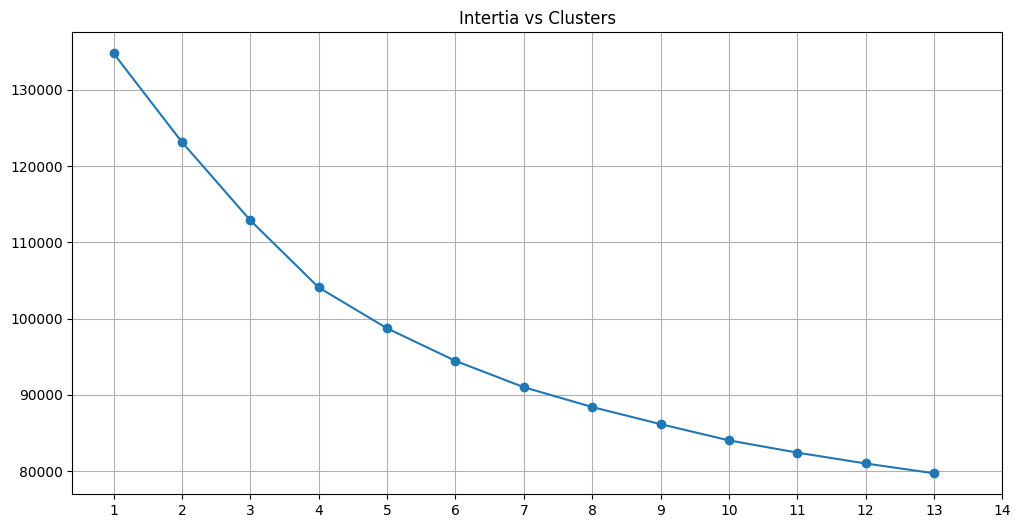

In [13]:
# elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1, 14), inertias, marker='o')
plt.title('Intertia vs Clusters')
plt.xticks(ticks=range(1, 15), labels=range(1, 15))

plt.grid()
plt.show()

The curve started to decreasing between 5 and 7 clusters, but the highest drop in is between 5 and 6, so I will choose the K equals 5.

In [14]:
# K-means model
model = KMeans(n_clusters=5)
clusters = model.fit_predict(customers_scaled)
clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 1, 2, ..., 4, 0, 4], dtype=int32)

In [15]:
customers['cluster'] = clusters + 1
customers.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,cluster
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061,3
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105,2
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000,3
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760,1
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000,5


## Analyzing Results

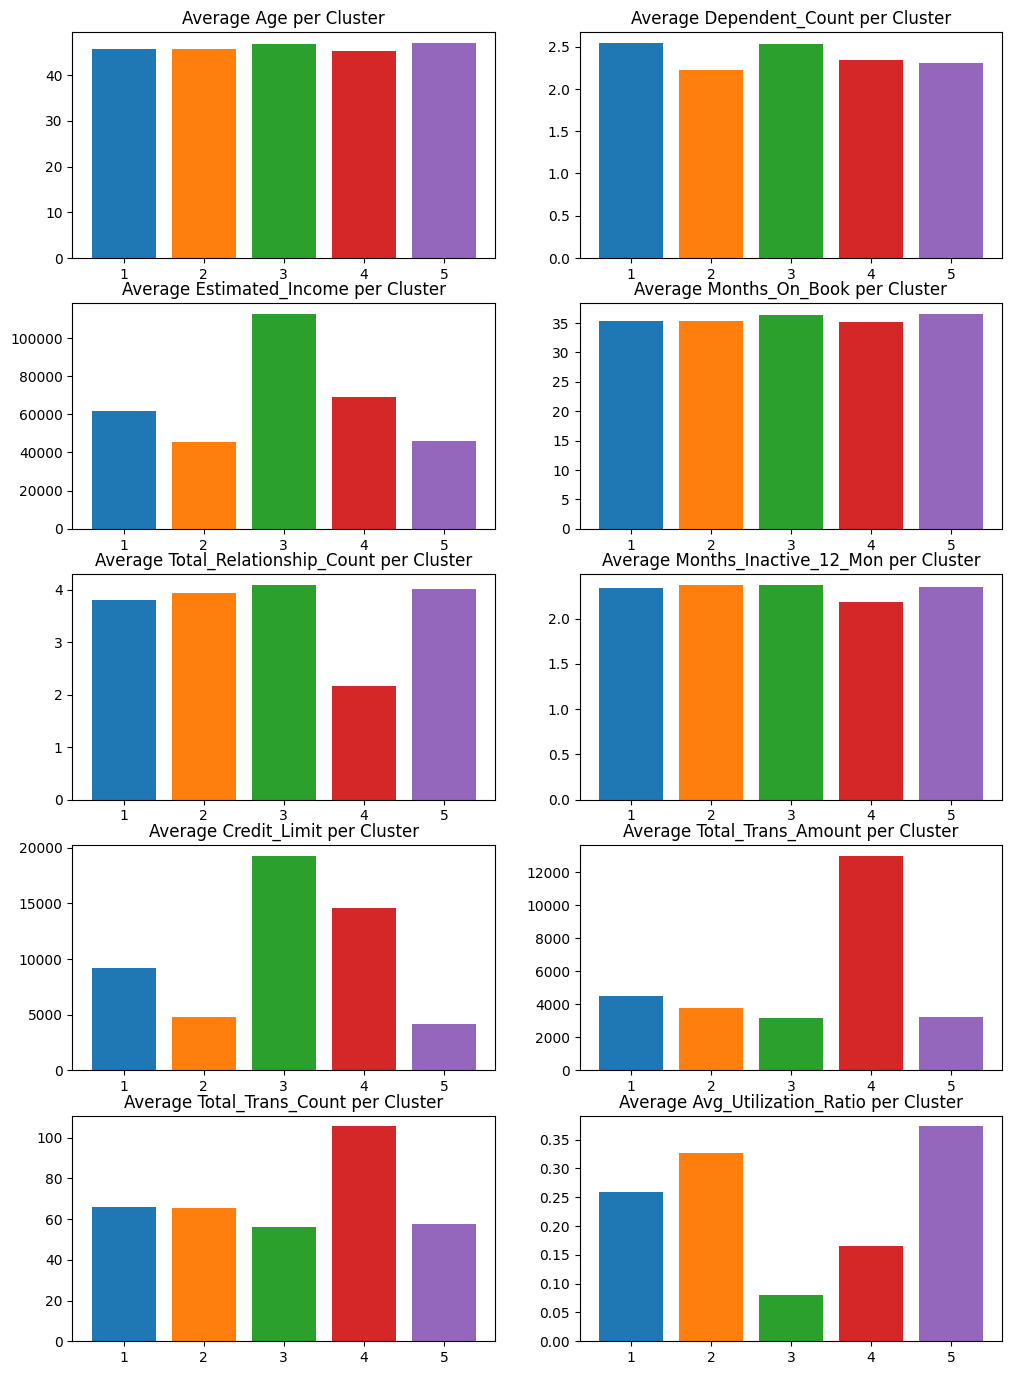

In [16]:
num_cols = customers.select_dtypes(include=np.number).drop(['customer_id', 'cluster'], axis = 1).columns

fig = plt.figure(figsize=(12,17))

for n, col in enumerate(num_cols):
    grouped = customers.groupby('cluster')[col].mean()
    ax = fig.add_subplot(5,2,n+1)
    ax.bar(grouped.index, grouped, color = sns.color_palette())
    ax.set_title(f'Average {col.title()} per Cluster')
    ax.xaxis.grid(False)

plt.show()

Now let's visualize the variables witch was strong correlated.

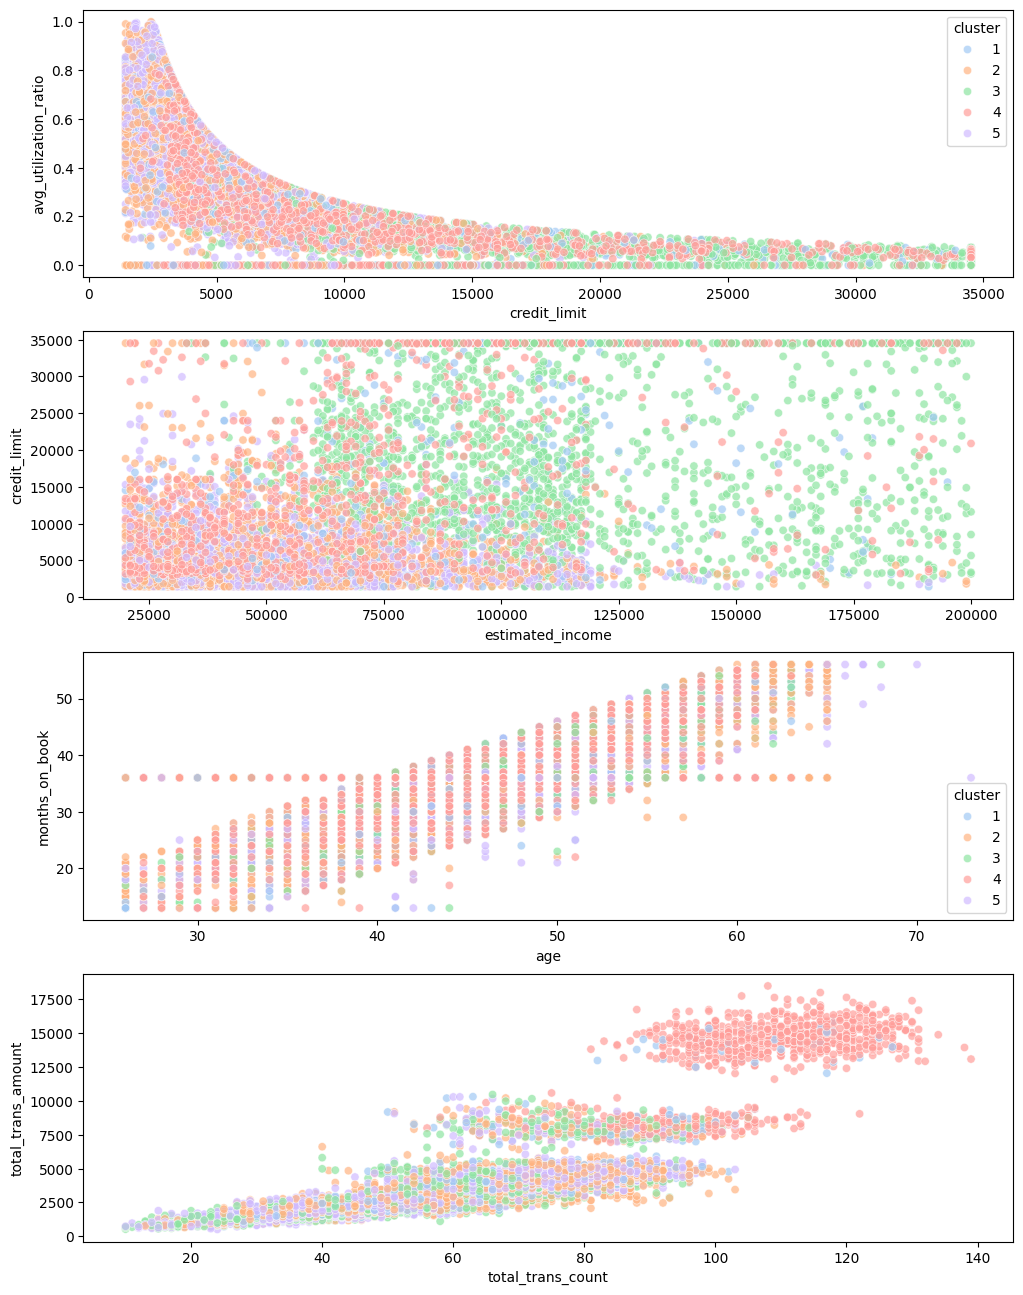

In [17]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1 , figsize=(12, 16))
# semi-strong correlation
sns.scatterplot(x='credit_limit', y='avg_utilization_ratio', hue='cluster', data=customers, alpha=0.7, ax=ax1, palette='pastel')
sns.scatterplot(x='estimated_income', y='credit_limit', hue='cluster', data=customers, alpha=0.7, ax=ax2, legend=False, palette='pastel')
# strong correlation
sns.scatterplot(x='age', y='months_on_book', hue='cluster', data=customers, alpha=0.7, ax=ax3, palette='pastel')
sns.scatterplot(x='total_trans_count', y='total_trans_amount', hue='cluster', data=customers, alpha=0.7, ax=ax4, legend=False, palette='pastel')

plt.show()

After plotting high correlated variables we can check the categorical variables grouped by clusters.

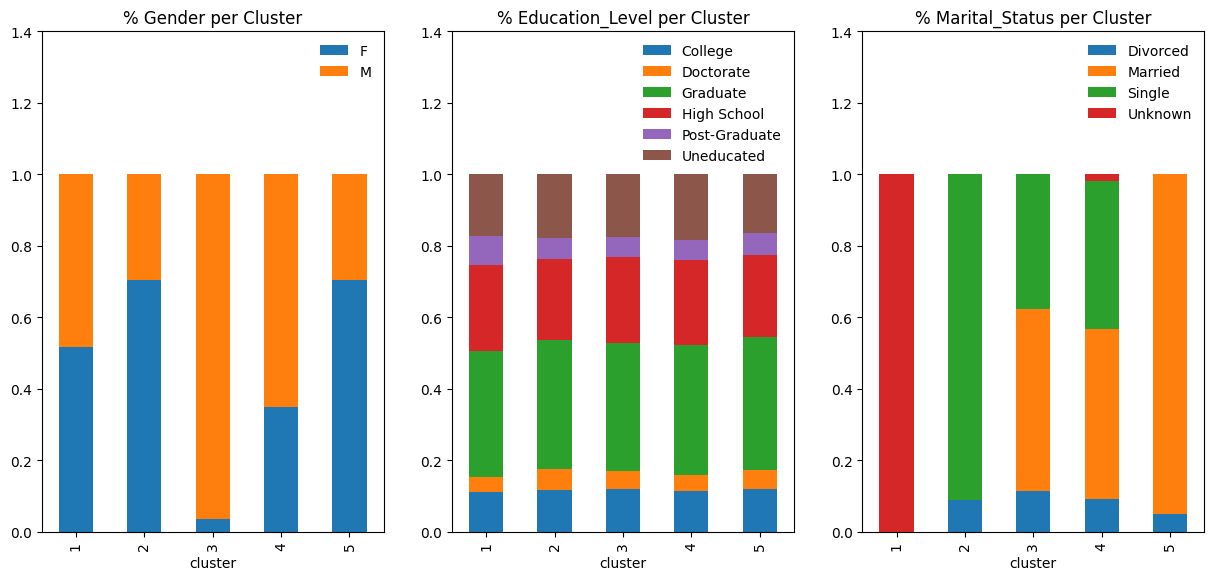

In [18]:
cat_col = customers.select_dtypes(include=['object'])

fig = plt.figure(figsize = (15,6.5))
for n, col in enumerate(cat_col):
    df_to_plot = pd.crosstab(index = customers['cluster'], columns=customers[col],
                            values = customers[col], aggfunc='size', normalize='index')
    ax = fig.add_subplot(1, 3, n+1)
    df_to_plot.plot(kind='bar', ax=ax, stacked=True)
    ax.set_title(f'% {col.title()} per Cluster')
    ax.set_ylim(0, 1.4)
    ax.legend(frameon=False)

plt.show()

## Cluster characteristics

### Cluster 1

### Cluster 2

### Cluster 3

### Cluster 4


### Cluster 5